In [1]:
# Installing yahoo finance
!pip install yfinance --upgrade --no-cache-dir

  Attempting uninstall: yfinance
    Found existing installation: yfinance 0.1.68
    Uninstalling yfinance-0.1.68:
      Successfully uninstalled yfinance-0.1.68


In [2]:
# pulling sensex data
import yfinance as yf

Sensex = yf.Ticker("^BSESN")
hist = Sensex.history(start="2017-01-01", end="2017-04-30")
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2017-01-02,26711.150391,26720.980469,26447.060547,26595.449219,8000,0,0
2017-01-03,26616.919922,26724.400391,26488.369141,26643.240234,9800,0,0
2017-01-04,26677.220703,26723.369141,26606.060547,26633.130859,8100,0,0
2017-01-05,26738.419922,26917.210938,26738.419922,26878.240234,9800,0,0
2017-01-06,26929.689453,27009.609375,26733.330078,26759.230469,7800,0,0
...,...,...,...,...,...,...,...
2017-04-24,29407.679688,29681.330078,29392.990234,29655.839844,8900,0,0
2017-04-25,29825.140625,29961.820312,29780.839844,29943.240234,8600,0,0
2017-04-26,30030.199219,30167.089844,29968.570312,30133.349609,10900,0,0


In [3]:
!pip install pandas-datareader

In [4]:
import pandas as pd


In [5]:
import datetime as dt

In [6]:
import pandas_datareader.data as web

In [79]:
df = web.DataReader('^BSESN', 'yahoo', start='2001-01-02', end='2020-12-31')

In [80]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2001-01-02,4028.570068,3929.370117,3953.219971,4018.879883,0.0,4018.879883
2001-01-03,4067.659912,3977.580078,3977.580078,4060.020020,0.0,4060.020020
2001-01-04,4180.970215,4109.549805,4180.970215,4115.370117,0.0,4115.370117
2001-01-05,4195.009766,4115.350098,4116.339844,4183.729980,0.0,4183.729980
2001-01-08,4206.720215,4101.529785,4164.759766,4120.430176,0.0,4120.430176


In [81]:
df['Price_diff'] = df['Close'] - df['Open']
df['Price_diff']


Date
2001-01-02     65.659912
2001-01-03     82.439941
2001-01-04    -65.600098
2001-01-05     67.390137
2001-01-08    -44.329590
                 ...    
2020-12-24    230.050781
2020-12-28    200.160156
2020-12-29    146.457031
2020-12-30    -42.812500
2020-12-31     -1.781250
Name: Price_diff, Length: 4927, dtype: float64

In [82]:
# create a new column based on condition
import numpy as np
df['Price_Movement'] = np.where(df['Price_diff'] >= 0, 1, 0)
# display the dataframe
print(df)

                    High           Low          Open         Close   Volume  \
Date                                                                          
2001-01-02   4028.570068   3929.370117   3953.219971   4018.879883      0.0   
2001-01-03   4067.659912   3977.580078   3977.580078   4060.020020      0.0   
2001-01-04   4180.970215   4109.549805   4180.970215   4115.370117      0.0   
2001-01-05   4195.009766   4115.350098   4116.339844   4183.729980      0.0   
2001-01-08   4206.720215   4101.529785   4164.759766   4120.430176      0.0   
...                  ...           ...           ...           ...      ...   
2020-12-24  47053.398438  46539.019531  46743.488281  46973.539062  13700.0   
2020-12-28  47406.718750  47148.238281  47153.589844  47353.750000   9600.0   
2020-12-29  47714.550781  47361.898438  47466.621094  47613.078125  12800.0   
2020-12-30  47807.851562  47358.359375  47789.031250  47746.218750  15600.0   
2020-12-31  47896.968750  47602.121094  47753.109375

In [83]:
df_Price_Movement = df[["Price_Movement"]]

In [84]:
df_Price_Movement.reset_index(level=0, inplace=True)

In [85]:
df_Price_Movement

,Date,Price_Movement
0,2001-01-02,1
1,2001-01-03,1
2,2001-01-04,0
3,2001-01-05,1
4,2001-01-08,0
...,...,...
4922,2020-12-24,1
4923,2020-12-28,1
4924,2020-12-29,1
4925,2020-12-30,0


In [86]:
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates
plt.style.use('seaborn')

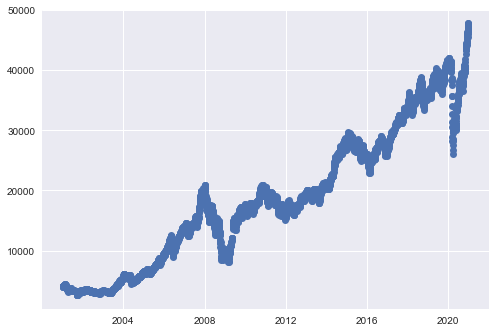

In [13]:
# timeseries 
# plt.plot_date(df_close_price.Date,df_close_price.Close )

In [87]:
# Collecting the news headlines data
df_news = pd.read_csv("india-news-headlines.csv")

In [88]:
df_news['publish_date'] = pd.to_datetime(df_news['publish_date'], format='%Y%m%d')

In [89]:
df_news['publish_date']

0         2001-01-02
1         2001-01-02
2         2001-01-02
3         2001-01-02
4         2001-01-02
             ...    
3424062   2020-12-31
3424063   2020-12-31
3424064   2020-12-31
3424065   2020-12-31
3424066   2020-12-31
Name: publish_date, Length: 3424067, dtype: datetime64[ns]

In [92]:
# Merging headlines data and price data
df_price_news = pd.merge(df_Price_Movement, df_news, left_on = 'Date', right_on = 'publish_date')

In [93]:
df_price_news

,Date,Price_Movement,publish_date,headline_category,headline_text
0,2001-01-02,1,2001-01-02,unknown,Status quo will not be disturbed at Ayodhya; s...
1,2001-01-02,1,2001-01-02,unknown,Fissures in Hurriyat over Pak visit
2,2001-01-02,1,2001-01-02,unknown,America's unwanted heading for India?
3,2001-01-02,1,2001-01-02,unknown,For bigwigs; it is destination Goa
4,2001-01-02,1,2001-01-02,unknown,Extra buses to clear tourist traffic
...,...,...,...,...,...
2334768,2020-12-31,0,2020-12-31,city.jodhpur,Covid-19: Despite dip in cases; Rajasthan amon...
2334769,2020-12-31,0,2020-12-31,city.udaipur,Covid-19: Despite dip in cases; Rajasthan amon...
2334770,2020-12-31,0,2020-12-31,city.ajmer,Covid-19: Despite dip in cases; Rajasthan amon...
2334771,2020-12-31,0,2020-12-31,removed,Govt extends deadline for use of FASTag till F...


In [95]:
#Intalling pytorch
# https://www.gcptutorials.com/post/how-to-install-pytorch-with-pip
!pip3 install torch torchvision torchaudio

In [96]:
# Verification of pytorch instalation
# https://pytorch.org/get-started/locally/
import torch
x = torch.rand(5, 3)
print(x)

tensor([[0.5846, 0.3865, 0.6845],
        [0.0835, 0.2256, 0.2154],
        [0.0446, 0.8010, 0.4571],
        [0.5326, 0.1986, 0.0786],
        [0.8694, 0.6349, 0.3743]])


In [97]:
# Installing transformers
# https://huggingface.co/transformers/v3.5.1/installation.html
!pip install transformers[torch]

In [98]:
# Install datasets
# https://huggingface.co/docs/datasets/installation.html
!pip install datasets
from datasets import Dataset
dataset = Dataset.from_pandas(df_price_news)

In [99]:
dataset.info

DatasetInfo(description='', citation='', homepage='', license='', features={'Date': Value(dtype='timestamp[ns]', id=None), 'Price_Movement': Value(dtype='int32', id=None), 'publish_date': Value(dtype='timestamp[ns]', id=None), 'headline_category': Value(dtype='string', id=None), 'headline_text': Value(dtype='string', id=None), '__index_level_0__': Value(dtype='int64', id=None)}, post_processed=None, supervised_keys=None, task_templates=None, builder_name=None, config_name=None, version=None, splits=None, download_checksums=None, download_size=None, post_processing_size=None, dataset_size=None, size_in_bytes=None)

In [100]:
dataset['headline_text'][:10]

['Status quo will not be disturbed at Ayodhya; says Vajpayee',
 'Fissures in Hurriyat over Pak visit',
 "America's unwanted heading for India?",
 'For bigwigs; it is destination Goa',
 'Extra buses to clear tourist traffic',
 'Dilute the power of transfers; says Riberio',
 'Focus shifts to teaching of Hindi',
 'IT will become compulsory in schools',
 "Move to stop freedom fighters' pension flayed",
 'Gilani claims he applied for passport 2 years ago']

In [101]:
dataset.column_names

['Date',
 'Price_Movement',
 'publish_date',
 'headline_category',
 'headline_text',
 '__index_level_0__']

In [102]:
dataset.features

{'Date': Value(dtype='timestamp[ns]', id=None),
 'Price_Movement': Value(dtype='int32', id=None),
 'publish_date': Value(dtype='timestamp[ns]', id=None),
 'headline_category': Value(dtype='string', id=None),
 'headline_text': Value(dtype='string', id=None),
 '__index_level_0__': Value(dtype='int64', id=None)}

In [103]:
from transformers import pipeline

In [104]:
Sentiment_assessment = pipeline('sentiment-analysis')(dataset['headline_text'][:5000])
Sentiment_assessment 


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)


[{'label': 'POSITIVE', 'score': 0.9984765648841858},
 {'label': 'NEGATIVE', 'score': 0.9790924787521362},
 {'label': 'NEGATIVE', 'score': 0.9962078332901001},
 {'label': 'POSITIVE', 'score': 0.9991756081581116},
 {'label': 'POSITIVE', 'score': 0.8780655264854431},
 {'label': 'NEGATIVE', 'score': 0.9996004700660706},
 {'label': 'NEGATIVE', 'score': 0.7088884115219116},
 {'label': 'POSITIVE', 'score': 0.9914770722389221},
 {'label': 'NEGATIVE', 'score': 0.9742674231529236},
 {'label': 'NEGATIVE', 'score': 0.9743077754974365},
 {'label': 'NEGATIVE', 'score': 0.9996956586837769},
 {'label': 'NEGATIVE', 'score': 0.974862277507782},
 {'label': 'NEGATIVE', 'score': 0.9984949827194214},
 {'label': 'NEGATIVE', 'score': 0.8973601460456848},
 {'label': 'POSITIVE', 'score': 0.9817278385162354},
 {'label': 'NEGATIVE', 'score': 0.8933578729629517},
 {'label': 'NEGATIVE', 'score': 0.9652534127235413},
 {'label': 'POSITIVE', 'score': 0.9953705668449402},
 {'label': 'POSITIVE', 'score': 0.9690207242965

In [ ]:
# print(', '.join(metric for metric in metrics_list))

In [ ]:
# from datasets import list_metrics
# metrics_list = list_metrics()
# len(metrics_list)

In [105]:
import json

# Converts input dictionary into
# string and stores it in json_string

json_string = json.dumps(Sentiment_assessment)
print('Equivalent json string of input dictionary:',
	json_string)
print("	 ")

# Checking type of object
# returned by json.dumps
print(type(json_string))


Equivalent json string of input dictionary: [{"label": "POSITIVE", "score": 0.9984765648841858}, {"label": "NEGATIVE", "score": 0.9790924787521362}, {"label": "NEGATIVE", "score": 0.9962078332901001}, {"label": "POSITIVE", "score": 0.9991756081581116}, {"label": "POSITIVE", "score": 0.8780655264854431}, {"label": "NEGATIVE", "score": 0.9996004700660706}, {"label": "NEGATIVE", "score": 0.7088884115219116}, {"label": "POSITIVE", "score": 0.9914770722389221}, {"label": "NEGATIVE", "score": 0.9742674231529236}, {"label": "NEGATIVE", "score": 0.9743077754974365}, {"label": "NEGATIVE", "score": 0.9996956586837769}, {"label": "NEGATIVE", "score": 0.974862277507782}, {"label": "NEGATIVE", "score": 0.9984949827194214}, {"label": "NEGATIVE", "score": 0.8973601460456848}, {"label": "POSITIVE", "score": 0.9817278385162354}, {"label": "NEGATIVE", "score": 0.8933578729629517}, {"label": "NEGATIVE", "score": 0.9652534127235413}, {"label": "POSITIVE", "score": 0.9953705668449402}, {"label": "POSITIVE"

In [106]:
for c in json_string:
    split = c.split(",")
print(json_string.split(','))

['[{"label": "POSITIVE"', ' "score": 0.9984765648841858}', ' {"label": "NEGATIVE"', ' "score": 0.9790924787521362}', ' {"label": "NEGATIVE"', ' "score": 0.9962078332901001}', ' {"label": "POSITIVE"', ' "score": 0.9991756081581116}', ' {"label": "POSITIVE"', ' "score": 0.8780655264854431}', ' {"label": "NEGATIVE"', ' "score": 0.9996004700660706}', ' {"label": "NEGATIVE"', ' "score": 0.7088884115219116}', ' {"label": "POSITIVE"', ' "score": 0.9914770722389221}', ' {"label": "NEGATIVE"', ' "score": 0.9742674231529236}', ' {"label": "NEGATIVE"', ' "score": 0.9743077754974365}', ' {"label": "NEGATIVE"', ' "score": 0.9996956586837769}', ' {"label": "NEGATIVE"', ' "score": 0.974862277507782}', ' {"label": "NEGATIVE"', ' "score": 0.9984949827194214}', ' {"label": "NEGATIVE"', ' "score": 0.8973601460456848}', ' {"label": "POSITIVE"', ' "score": 0.9817278385162354}', ' {"label": "NEGATIVE"', ' "score": 0.8933578729629517}', ' {"label": "NEGATIVE"', ' "score": 0.9652534127235413}', ' {"label": "P

In [107]:
label=[]
for i in Sentiment_assessment:
   label.append(i['label'])

In [108]:
# dataset_sa['label'] = label
# dataset_sa

NameError: name 'dataset_sa' is not defined

In [109]:
# # Import label encoder
# from sklearn import preprocessing

# # label_encoder object knows how to understand word labels.
# label_encoder = preprocessing.LabelEncoder()

# # Encode labels in column 'species'.
# ['label']= label_encoder.fit_transform(df['label'])

# df['label'].unique()



SyntaxError: cannot assign to literal (<ipython-input-109-03fa876b1e90>, line 8)

In [41]:
# dataset['Date']

KeyboardInterrupt: 

In [112]:
dataset_new = dataset[:5000]
dataset_new

{'Date': [Timestamp('2001-01-02 00:00:00'),
  Timestamp('2001-01-02 00:00:00'),
  Timestamp('2001-01-02 00:00:00'),
  Timestamp('2001-01-02 00:00:00'),
  Timestamp('2001-01-02 00:00:00'),
  Timestamp('2001-01-02 00:00:00'),
  Timestamp('2001-01-02 00:00:00'),
  Timestamp('2001-01-02 00:00:00'),
  Timestamp('2001-01-02 00:00:00'),
  Timestamp('2001-01-02 00:00:00'),
  Timestamp('2001-01-02 00:00:00'),
  Timestamp('2001-01-02 00:00:00'),
  Timestamp('2001-01-02 00:00:00'),
  Timestamp('2001-01-02 00:00:00'),
  Timestamp('2001-01-02 00:00:00'),
  Timestamp('2001-01-02 00:00:00'),
  Timestamp('2001-01-02 00:00:00'),
  Timestamp('2001-01-02 00:00:00'),
  Timestamp('2001-01-02 00:00:00'),
  Timestamp('2001-01-02 00:00:00'),
  Timestamp('2001-01-02 00:00:00'),
  Timestamp('2001-01-02 00:00:00'),
  Timestamp('2001-01-02 00:00:00'),
  Timestamp('2001-01-02 00:00:00'),
  Timestamp('2001-01-02 00:00:00'),
  Timestamp('2001-01-02 00:00:00'),
  Timestamp('2001-01-02 00:00:00'),
  Timestamp('2001-01

In [113]:
dataset_new['label'] = label
dataset_new

{'Date': [Timestamp('2001-01-02 00:00:00'),
  Timestamp('2001-01-02 00:00:00'),
  Timestamp('2001-01-02 00:00:00'),
  Timestamp('2001-01-02 00:00:00'),
  Timestamp('2001-01-02 00:00:00'),
  Timestamp('2001-01-02 00:00:00'),
  Timestamp('2001-01-02 00:00:00'),
  Timestamp('2001-01-02 00:00:00'),
  Timestamp('2001-01-02 00:00:00'),
  Timestamp('2001-01-02 00:00:00'),
  Timestamp('2001-01-02 00:00:00'),
  Timestamp('2001-01-02 00:00:00'),
  Timestamp('2001-01-02 00:00:00'),
  Timestamp('2001-01-02 00:00:00'),
  Timestamp('2001-01-02 00:00:00'),
  Timestamp('2001-01-02 00:00:00'),
  Timestamp('2001-01-02 00:00:00'),
  Timestamp('2001-01-02 00:00:00'),
  Timestamp('2001-01-02 00:00:00'),
  Timestamp('2001-01-02 00:00:00'),
  Timestamp('2001-01-02 00:00:00'),
  Timestamp('2001-01-02 00:00:00'),
  Timestamp('2001-01-02 00:00:00'),
  Timestamp('2001-01-02 00:00:00'),
  Timestamp('2001-01-02 00:00:00'),
  Timestamp('2001-01-02 00:00:00'),
  Timestamp('2001-01-02 00:00:00'),
  Timestamp('2001-01

In [114]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'labels'.
dataset_new['label'] = label_encoder.fit_transform(dataset_new['label'])

dataset_new['label'] 


array([1, 0, 0, ..., 0, 0, 1], dtype=int64)

In [115]:
dataset_new

{'Date': [Timestamp('2001-01-02 00:00:00'),
  Timestamp('2001-01-02 00:00:00'),
  Timestamp('2001-01-02 00:00:00'),
  Timestamp('2001-01-02 00:00:00'),
  Timestamp('2001-01-02 00:00:00'),
  Timestamp('2001-01-02 00:00:00'),
  Timestamp('2001-01-02 00:00:00'),
  Timestamp('2001-01-02 00:00:00'),
  Timestamp('2001-01-02 00:00:00'),
  Timestamp('2001-01-02 00:00:00'),
  Timestamp('2001-01-02 00:00:00'),
  Timestamp('2001-01-02 00:00:00'),
  Timestamp('2001-01-02 00:00:00'),
  Timestamp('2001-01-02 00:00:00'),
  Timestamp('2001-01-02 00:00:00'),
  Timestamp('2001-01-02 00:00:00'),
  Timestamp('2001-01-02 00:00:00'),
  Timestamp('2001-01-02 00:00:00'),
  Timestamp('2001-01-02 00:00:00'),
  Timestamp('2001-01-02 00:00:00'),
  Timestamp('2001-01-02 00:00:00'),
  Timestamp('2001-01-02 00:00:00'),
  Timestamp('2001-01-02 00:00:00'),
  Timestamp('2001-01-02 00:00:00'),
  Timestamp('2001-01-02 00:00:00'),
  Timestamp('2001-01-02 00:00:00'),
  Timestamp('2001-01-02 00:00:00'),
  Timestamp('2001-01

In [116]:
dataset_new = pd.DataFrame.from_dict(dataset_new)
  
dataset_new

,Date,Price_Movement,publish_date,headline_category,headline_text,__index_level_0__,label
0,2001-01-02,1,2001-01-02,unknown,Status quo will not be disturbed at Ayodhya; s...,0,1
1,2001-01-02,1,2001-01-02,unknown,Fissures in Hurriyat over Pak visit,1,0
2,2001-01-02,1,2001-01-02,unknown,America's unwanted heading for India?,2,0
3,2001-01-02,1,2001-01-02,unknown,For bigwigs; it is destination Goa,3,1
4,2001-01-02,1,2001-01-02,unknown,Extra buses to clear tourist traffic,4,1
...,...,...,...,...,...,...,...
4995,2001-06-29,1,2001-06-29,unknown,Goa varsity will enjoy autonomy: CM,4995,1
4996,2001-06-29,1,2001-06-29,city.chandigarh,Finally Chauhan reaches home,4996,1
4997,2001-06-29,1,2001-06-29,city.pune,Pawar asks people to protest ban on onion export,4997,0
4998,2001-06-29,1,2001-06-29,unknown,STF offensive a bid to suppress truth: Nedumaran,4998,0


In [120]:
dataset_analysis=dataset_new.groupby('Date').mean()
dataset_analysis

,Price_Movement,__index_level_0__,label
Date,,,
2001-01-02,1.0,42.5,0.383721
2001-01-03,1.0,106.0,0.365854
2001-01-04,0.0,203.0,0.522876
2001-01-05,1.0,342.5,0.634921
2001-01-08,0.0,438.5,0.257576
...,...,...,...
2001-06-25,0.0,4695.0,0.415385
2001-06-26,1.0,4752.0,0.469388
2001-06-27,1.0,4817.0,0.296296


In [122]:
dataset_analysis_2 = dataset_analysis.drop(columns=['__index_level_0__'])
dataset_analysis_2

,Price_Movement,label
Date,,
2001-01-02,1.0,0.383721
2001-01-03,1.0,0.365854
2001-01-04,0.0,0.522876
2001-01-05,1.0,0.634921
2001-01-08,0.0,0.257576
...,...,...
2001-06-25,0.0,0.415385
2001-06-26,1.0,0.469388
2001-06-27,1.0,0.296296


In [127]:
dataset_analysis_2['Sentiment'] = [1 if x >= 0.5 else 0 for x in dataset_analysis_2['label']]
dataset_analysis_2

,Price_Movement,label,Sentiment
Date,,,
2001-01-02,1.0,0.383721,0
2001-01-03,1.0,0.365854,0
2001-01-04,0.0,0.522876,1
2001-01-05,1.0,0.634921,1
2001-01-08,0.0,0.257576,0
...,...,...,...
2001-06-25,0.0,0.415385,0
2001-06-26,1.0,0.469388,0
2001-06-27,1.0,0.296296,0


In [129]:
dataset_analysis_2 = dataset_analysis_2.drop(columns=['label'])
dataset_analysis_2

,Price_Movement,Sentiment
Date,,
2001-01-02,1.0,0
2001-01-03,1.0,0
2001-01-04,0.0,1
2001-01-05,1.0,1
2001-01-08,0.0,0
...,...,...
2001-06-25,0.0,0
2001-06-26,1.0,0
2001-06-27,1.0,0


In [135]:
dataset_analysis_2.eval()

TypeError: eval() missing 1 required positional argument: 'expr'

In [130]:
dataset_analysis_2.corr()

,Price_Movement,Sentiment
Price_Movement,1.000000,-0.009231
Sentiment,-0.009231,1.000000


TypeError: plot() got multiple values for argument 'data'

In [ ]:
# df = pd.DataFrame(dataset_new)

In [ ]:
# df.groupby(['Date']).mean()

In [ ]:
# Sentiment_assessment['score']



# # getting length of list
# length = len(Sentiment_assessment)

# # Iterating the index
# # same as 'for i in range(len(list))'
# for i in range(length):
# 	print(list[i])

In [ ]:
# Python3 code to iterate over a list


# # Using for loop
# for i in Sentiment_assessment:
# 	print(i)


In [ ]:
# type(dataset[100])

In [ ]:
# Python3 program to Convert a
# Python3 program to Convert a
# list to dictionary

# def Convert(lst):
# 	res_dct = {lst[i]: lst[i + 1] for i in range(0, len(lst), 2)}
# 	return res_dct
		
# # Driver code
# lst = Sentiment_assessment
# print(Convert(lst))



In [ ]:
# Python3 program to Convert a
# list to dictionary

# def Convert(a):
# 	it = iter(a)
# 	res_dct = dict(zip(it, it))
# 	return res_dct
		
# # Driver code
# lst = ['a', 1, 'b', 2, 'c', 3]
# print(Convert(lst))


In [ ]:
#def getPolarity(text):
#return TextBlob(text).sentiment.polarity

In [ ]:
#!pip install -U textblob
#from textblob import TextBlob
#import matplotlib.pyplot as plt
#plt.style.use('fivethirtyeight')

In [ ]:
#def getPolarity(text):
#return TextBlob(text).sentiment.polarity

In [ ]:
#df_price_news.sample = df_price_news.loc[0:200, :]


In [ ]:
#df_price_news.sample['polarity'] = df_price_news.sample['headline_text'].apply(getPolarity)
#df_price_news.sample

In [ ]:
#filt = df_price_news.sample['polarity'] > 0
#df_price_news.sample.loc[~filt, 'Close']

In [ ]:
#df_price_news.sample.info()

In [ ]:
# based on the probability of how negative, if new negative is found with same probabity then stock go down or two day in arow then more stock go down?